# **Training and Evaluation with build-in methods**

## **Setup && Introduction**

In [1]:
import tensorboard

import tensorflow as tf
import tensorflow.keras as tfk
from tensorflow.keras import layers as lyrs

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# HYPERPARAMETERS uniform through out the code
BS = 64 # Batch_Size
EP = 10 # Epochs
VB = 1 # Verbose

## **API overview: An End-to-End Example**

In [3]:
# Creating a basic Mnist Classifier for starting
(tr_data, tr_lbls), (ts_data, ts_lbls) = tfk.datasets.mnist.load_data()

tr_data = tr_data.reshape(-1, 28*28).astype('float32') / 255.0
ts_data = ts_data.reshape(-1, 28*28).astype('float32') / 255.0

val_data = tr_data[:-10000] # Reserve last 10,000 images for validation set
val_lbls = tr_lbls[:-10000] # Take last 10,000 labels as-well.

In [4]:
# Define the Model Structure and Compile
Model_mnist = tfk.Sequential(
    [
        lyrs.Dense(128, activation='relu', input_shape=(784,), name= 'InputLayer'),
        lyrs.Dense(64, activation='relu', name= 'Dense_1'),
        lyrs.Dense(10, activation='softmax', name= 'OutputLayer'),
    ], name= 'Digits_Recognition_Model'
)

Model_mnist.summary()

Model_mnist.compile(
    optimizer=tfk.optimizers.Nadam(),
    loss= tfk.losses.SparseCategoricalCrossentropy(),
    metrics= [tfk.metrics.SparseCategoricalAccuracy()]
)

Model: "Digits_Recognition_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 128)               100480    
                                                                 
 Dense_1 (Dense)             (None, 64)                8256      
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Training the Model and seeing the result!!
Model_mnist.fit(
    tr_data, tr_lbls,
    validation_data= (val_data, val_lbls),
    epochs= EP, verbose= VB,
    batch_size= BS
)

Epoch 1/10
938/938 [==============================] - 10s 7ms/step - loss: 0.2698 - sparse_categorical_accuracy: 0.9227 - val_loss: 0.1316 - val_sparse_categorical_accuracy: 0.9612
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.1114 - sparse_categorical_accuracy: 0.9672 - val_loss: 0.0820 - val_sparse_categorical_accuracy: 0.9758
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0770 - sparse_categorical_accuracy: 0.9761 - val_loss: 0.0559 - val_sparse_categorical_accuracy: 0.9831
Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0585 - sparse_categorical_accuracy: 0.9821 - val_loss: 0.0453 - val_sparse_categorical_accuracy: 0.9859
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0452 - sparse_categorical_accuracy: 0.9859 - val_loss: 0.0334 - val_sparse_categorical_accuracy: 0.9894
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0359 - sparse_categoric

In [6]:
# Evaluating the Model on Test Data!!
Model_mnist.evaluate(ts_data, ts_lbls, verbose= VB, batch_size= BS)

157/157 [==============================] - 1s 4ms/step - loss: 0.0842 - sparse_categorical_accuracy: 0.9792A: 0s - loss: 0.0878 - sparse_categorical_accuracy: 0.97


[0.0842050313949585, 0.979200005531311]

## **The Compile Method**

In [34]:
# A vauge Compile Function
Model_mnist.compile(
    optimizer= 'Adam',
    loss= 'MSE',
    metrics= ['accuracy']
)
# Typically, the compile function takes 3 main arguments
# OPTIMIZER, LOSS_FUNCTION,  and EVALUATION_METRIC(optional)

def get_model():
    Inp = tfk.Input(shape= (784, ))
    lyr = lyrs.Dense(64, activation='relu')(Inp)
    lyr = lyrs.Dense(64, activation='relu')(lyr)
    Out = lyrs.Dense(10)(lyr)

    return tfk.Model(inputs= Inp, outputs= Out)

def compile_model(model):
    model.summary()
    
    model.compile(
        optimizer= 'Adam',
        loss= tfk.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics= ['accuracy']
    )
    return model

# Once the Model is defined, it can be compiled
compiled_model = compile_model(get_model())

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_65 (Dense)            (None, 64)                50240     
                                                                 
 dense_66 (Dense)            (None, 64)                4160      
                                                                 
 dense_67 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


### **Built-in optimizers, losses and metrics**

**Visit `https://keras.io/api/` for in-depth information on inbuilt losses, metrics etc**

### **Custom Losses**
> **2 Methods of creating custom losses**
1. **Functional approach -- pass y_true and y_pred to a func and compute the difference between the two values**
2. **Sub-classing approach -- Implement methods __init__() and call()**

In [8]:
# Functional Approach
def Mean_SQ_Error(y_true, y_pred): 
    return tf.math.reduce_mean(tf.square(y_true - y_pred))


# Getting a Vauge Model calling a previously created function
model = get_model()

# Defining prams for compile
metric = tfk.metrics.SparseCategoricalAccuracy()
opt = tfk.optimizers.Adamax()
loss = Mean_SQ_Error

model.compile(
    optimizer= tfk.optimizers.Adamax(0.001),
    loss= Mean_SQ_Error,
    # metrics= [metric]
)

OneHot_lbls = tf.one_hot(tr_lbls, depth= 10)

# model.fit(tr_data, OneHot_lbls, epochs= EP, batch_size= BS)
model.fit(tr_data, OneHot_lbls, batch_size=64, epochs=5)

# Sparse Catagorical Cross Entropy will not work here...
...

# Custom Loss not working so-far

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0337
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0172
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0133
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0110
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0095


Ellipsis

In [9]:
# Sub-Classing using tf.keras.losses.Loss class
class MeSqEr_Custom(tfk.losses.Loss):
    def init(self, regfac= 0.1):
        super().__init__()
        self.regularization_factor = regfac
    
    def call(self, ytrue, ypred):
        SqErr1 = tf.square(ytrue - ypred)
        mse = tf.reduce_mean(SqErr1)
        
        SqErr2 = tf.square(0.5 - ypred)
        reg = tf.reduce_mean(SqErr2)
        
        cstm_loss = mse + reg * self.regularization_factor
        return cstm_loss
    

class CustomMSE(tfk.losses.Loss):
    def __init__(self, regularization_factor=0.1, name="custom_mse"):
        super().__init__(name=name)
        self.regularization_factor = regularization_factor

    def call(self, y_true, y_pred):
        mse = tf.math.reduce_mean(tf.square(y_true - y_pred))
        reg = tf.math.reduce_mean(tf.square(0.5 - y_pred))
        return mse + reg * self.regularization_factor

# Get a Model    
model = get_model()

# Define prams
# optimizer and metric already defined from the last block: opt, metric
# cstm_mse = MeSqEr_Custom(0.25)
cstm_mse = CustomMSE()

model.compile(
    optimizer= opt,
    loss= cstm_mse,
    # metrics= [metric]
)

tr_lbls_OneHot = tf.one_hot(tr_lbls, depth= 10)
model.fit(tr_data, tr_lbls_OneHot, epochs=EP, verbose=VB, batch_size=BS)

# Custom Loss not working so-far

Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.0520A: 1s - l - ETA
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0374
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0342
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0323
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0311
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0301
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0295
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0289
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0284
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0281


### **Custom Metrics**

In [10]:
'''
    To implement custom metrics, you need to subclass the 
    tf.metrics.Metric class and implement 4 functions
    1. init()   2. update_state()   3. reset_state()    4. result()  
'''

# Here's a simple example showing how to implement a CategoricalTruePositives metric 
# that counts how many samples were correctly classified as belonging to a given class

class cstm_metric(tf.metrics.Metric):
    def __init__(self): #  create state variables for your metric
        super(cstm_metric, self).__init__()
        self.true_positives = self.add_weight(
            name= 'ctp',
            initializer= 'zeros'
        )
        
    # uses the targets y_true and the model predictions y_pred to update the state variables.
    def update_state(self, y_true, y_pred, sample_weight= None):
        y_pred = tf.reshape(
            tf.argmax(y_pred, axis= 1), shape=(-1, 1)
        )
        
        values = tf.cast(y_true, 'int32') == tf.cast(y_pred, 'int32')
        values = tf.cast(values, 'float32')
        
        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, 'float32')
            values = values * sample_weight
            
        self.true_positives.assign_add(tf.reduce_sum(values))
    
    def result(self):  # Uses the state variables to compute the final results.
        return self.true_positives
    
    def reset_state(self): # Reinitializes the state of the metric.
        self.true_positives.assign_add(0.0)

In [11]:
# Testing the new Metric
model = get_model()

model.compile(
    optimizer=opt,
    loss= tfk.losses.SparseCategoricalCrossentropy(),
    metrics= [cstm_metric()]
)

model.fit(tr_data, tr_lbls, epochs= EP)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.5540 - cstm_metric: 33530.0000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0895 - cstm_metric: 67447.0000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1952 - cstm_metric: 98866.0000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2547 - cstm_metric: 131537.0000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2677 - cstm_metric: 162987.0000
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2530 - cstm_metric: 192627.0000: 0s - loss: 2.2541 - cstm_metric: 1
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2165 - cstm_metric: 221879.0000
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1430 - cstm_metric: 250499.0000
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0680 - cs

### **Handling losses and metrics that donot fit the standard signature**

> **To achieve this, we call the add_loss() and add_metric() methods from within the call function of a custom Layer, and the metric and/or loss gets added to the main loss/metric passed to the model at the compile time**

In [13]:
class ActivityRegularizer(tfk.layers.Layer):
    def call(self, inputs):
        super(ActivityRegularizer, self).__init__()
        self.add_loss(tf.reduce_mean(inputs) * 0.1)
        return inputs

# Test the layer!!
inp = tfk.Input(shape= (784, ))
model_1 = get_model()  

reg_model = tfk.Sequential([
    model_1,
    ActivityRegularizer(),
    tfk.layers.Dense(3)]
)

model_1 = compile_model(reg_model)

model_1.fit(tr_data, tr_lbls, epochs=3, verbose= 1)
 

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: -15.4025 - accuracy: 0.0986
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: -231.3288 - accuracy: 0.1037A: 4s - loss
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: -518.1238 - accuracy: 0.1048A: 1s - loss: -487


#### **Handling Loss**

In [14]:
print("Dealing loss here!!")
class ActReg(lyrs.Layer):
    def call(self, inputs):
        # Using add_los mothod here to alter loss computation...
        self.add_loss(tf.reduce_sum(inputs) * 0.1)
        return inputs # Just Pass through the Layer

inp = tfk.Input(shape= (784, ))
x_ten = lyrs.Dense(64, 'relu')(inp)
x_ten = ActReg()(x_ten)

x_ten = lyrs.Dense(64, 'relu')(x_ten)
out = lyrs.Dense(10, 'relu')(x_ten)

model = tfk.Model(inputs= inp, outputs= out)

model.compile(
    opt, 
    loss= tfk.losses.SparseCategoricalCrossentropy(from_logits= True)
)

model.fit(tr_data, tr_lbls, epochs= EP, verbose= VB, batch_size= BS)

Dealing loss here!!
Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 3.2496A: 0s - los
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 2.3102A: 2s - los - ET
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 2.3039A: 0s - 
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 2.3023
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 2.3018
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 2.3017
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 2.3017A: 0s 
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 2.3016
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 2.3016
Epoch 10/10
938/938 [==============================] - 3s 4ms/step - loss: 2.3016


#### **Handling Metrcis**

In [15]:
print("Dealing metrics here!!")
class MetricLoggingLayer(tfk.layers.Layer):
    # The `aggregation` argument defines how to aggregate the 
    # per-batch values over each epoch
    # Aggregation mean simply averages them.
    def __init__(self, inputs):
        super(MetricLoggingLayer, self).__init__()
        self.add_metric(
            tfk.backend.std(inputs), name='std_activation', aggregation= 'mean' 
        )
        
        return inputs
    
opt_sch = tfk.optimizers.schedules.InverseTimeDecay(
    0.002,
    decay_steps= 32 * EP,
    decay_rate= 1,
    staircase= False
)

model = get_model()
model.compile(
    loss= tfk.losses.SparseCategoricalCrossentropy(from_logits= True),
    optimizer= tfk.optimizers.Adam(opt_sch),
    metrics=['accuracy']
)

hist = model.fit(
    tr_data,
    tr_lbls,
    epochs= EP,
    batch_size= BS,
    verbose= VB,
    validation_split= 0.2
)   
        
        

Dealing metrics here!!
Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.3051 - accuracy: 0.9112 - val_loss: 0.1739 - val_accuracy: 0.9516
Epoch 2/10
750/750 [==============================] - 3s 3ms/step - loss: 0.1545 - accuracy: 0.9550 - val_loss: 0.1449 - val_accuracy: 0.9589
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1258 - accuracy: 0.9637 - val_loss: 0.1316 - val_accuracy: 0.9621
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1099 - accuracy: 0.9688 - val_loss: 0.1249 - val_accuracy: 0.9649
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1001 - accuracy: 0.9717 - val_loss: 0.1212 - val_accuracy: 0.9641
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0929 - accuracy: 0.9741 - val_loss: 0.1165 - val_accuracy: 0.9663
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0871 - accuracy: 0.9756 - val_loss: 0.1149 - val_

### **Working with custom losses and metrics && Fuctional API**

In [35]:
# Sequential Model!!
inps = tfk.Input(
    shape=(784, ), name='Inputs'
)

lyr = tfk.layers.Dense(64, 'relu', input_shape= (784, ))(inps)
lyr = tfk.layers.Dense(64, 'relu')(lyr)
lyr = tfk.layers.Dense(64, 'relu')(lyr)
outs = tfk.layers.Dense(10, 'relu')(lyr)

model_fn = tfk.Model(
    inputs= inps,
    outputs= outs,
    name= 'FuncModel_with_CustomLosses_Metrics'
)

model.add_loss(
    Mean_SQ_Error 
    # tf.reduce_sum(x1) * 0.1
)

model_fn.add_metric(
    tfk.backend.std(lyr), name='std_of_activation_LastDenseLayer', aggregation='mean'
)

model_fn.compile(
    loss= tfk.losses.SparseCategoricalCrossentropy(from_logits= True),
    optimizer= tfk.optimizers.Adam(opt_sch),
    metrics=['accuracy']
)


hist = model_fn.fit(
    tr_data,
    tr_lbls,
    epochs= EP,
    batch_size= BS,
    verbose= VB,
    validation_split= 0.2
)   


Epoch 1/10
750/750 [==============================] - 5s 5ms/step - loss: 0.7860 - accuracy: 0.7329 - std_of_activation_LastDenseLayer: 1.3826 - val_loss: 0.5968 - val_accuracy: 0.7700 - val_std_of_activation_LastDenseLayer: 1.5346
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.5768 - accuracy: 0.7757 - std_of_activation_LastDenseLayer: 1.5916 - val_loss: 0.5710 - val_accuracy: 0.7768 - val_std_of_activation_LastDenseLayer: 1.6071
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.5513 - accuracy: 0.7809 - std_of_activation_LastDenseLayer: 1.6705 - val_loss: 0.5622 - val_accuracy: 0.7782 - val_std_of_activation_LastDenseLayer: 1.6533
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.5372 - accuracy: 0.7844 - std_of_activation_LastDenseLayer: 1.7117 - val_loss: 0.5571 - val_accuracy: 0.7784 - val_std_of_activation_LastDenseLayer: 1.6988
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss

### **Adding loss and metrics to a Layer**

In [ ]:
class LogisticEndpoint(tfk.layers.Layer):
    # this layer has Multiple functions.
    # 1. Calculate loss for Model 
    # 2. Calculate evaluation metrics
    # (No need to specify loss and metrics in model.compile)
    # 3. Return a vector of probabilities for each class. tf.nn.softmax
    def __init__(self, name=None):
        super(LogisticEndpoint, self).__init__(name= name)
        self.loss_fn = tfk.losses.SparseCategoricalCrossentropy(from_logits= True)
        self.acc = tfk.metrics.BinaryAccuracy()
        
    def call(self, target, logits, sample_weis=None):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        loss = self.loss_fn(target, logits, sample_weis)
        self.add_loss(loss)
        
        # Log accuracy as a metric and add it
        # to the layer using `self.add_metric()`
        acc = self.acc(target, logits, sample_weis)
        self.add_metric(acc, name= 'acc')
        
        # Return the inference-time prediction tensor (for `.predict()`).
        return tf.nn.softmax(logits)
    
    

# !!<==..==>!! I'll do this part at home !! !! !!


### **Automatically setting apart a validation holdout set**
> **`model.fit(..., validation_split= 0.xxxx)`  when your data is passed as NumPy arrays.**

## **Training and Evaluation from tf.Datasets**


### **TF.Datasets overview**
**Handling data that comes in shape of tf.dataset object**
> The tf.data API is a set of utilities in TensorFlow 2.0 for loading and preprocessing data in a way that's fast and scalable.

In [36]:
model = compile_model(get_model())

# For basic level, we'll use the same mnist data instance to create tf.dataset object

# convert numpy data into tf.data.Dataset object (training data)
training_dataset = tf.data.Dataset.from_tensor_slices((tr_data, tr_lbls))
training_dataset = training_dataset.shuffle(buffer_size=1024).batch(64)  # Shuffle and slice


# convert numpy data into tf.data.Dataset object (test data)
test_dataset = tf.data.Dataset.from_tensor_slices((ts_data, ts_lbls))
test_dataset = test_dataset.batch(64)

training_dataset

model.fit(
    training_dataset, 
    epochs= EP,
    verbose=VB,
)

# Note that the Dataset is reset at the end of each epoch, 
# so it can be reused of the next epoch.

# If you want to run training only on a specific number of batches 
# from this Dataset, you can pass the steps_per_epoch argument, 
# which specifies how many training steps the model should run 
# using this Dataset before moving on to the next epoch.

# If you do this, the dataset is not reset at the end of each epoch, 
# instead we just keep drawing the next batches. The dataset will 
# eventually run out of data (except for an infinitely-looping dataset).

model.fit(
    training_dataset, 
    epochs= EP,
    verbose=VB,
    steps_per_epoch= 32
)

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_72 (Dense)            (None, 64)                50240     
                                                                 
 dense_73 (Dense)            (None, 64)                4160      
                                                                 
 dense_74 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3173 - accuracy: 0.9104
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1377 - acc

### **Using a Validation dataset**

In [38]:
# validation split argument doesnt work on tf.Dataset Objects, 
# thus an iterable dataset has to be provided.

# creating a validation_dataset...!!
validation_dataset = tf.data.Dataset.from_tensor_slices((val_data, val_lbls))
validation_dataset = validation_dataset.shuffle(1024).batch(64)

# Using Model from the previous example!!
model.fit(
    training_dataset,
    validation_data= validation_dataset,
    epochs= EP,
    verbose= VB,
)

# If you want to run validation only on a specific number 
# of batches from this dataset, you can pass the validation_steps 
# argument, which specifies how many validation steps the model 
# should run with the validation dataset before interrupting 
# validation and moving on to the next epoch.

'''
    model.fit(
        training_dataset,
        validation_data=validation_dataset,
        epochs=EP,
        verbose=VB,
        validation_steps= 100
        # Only run validation using the first 10 batches of the dataset
        # using the `validation_steps` argument
    )
'''
...

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0100 - val_accuracy: 0.9966
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.0160 - val_accuracy: 0.9943
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0107 - accuracy: 0.9962 - val_loss: 0.0185 - val_accuracy: 0.9938
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0101 - accuracy: 0.9965 - val_loss: 0.0139 - val_accuracy: 0.9951
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.0080 - val_accuracy: 0.9973
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.0111 - val_accuracy: 0.9960
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.0054 - val_accuracy: 0.9981
Epoch 

Ellipsis

## **Other supported input formats**

**Tried Formats**
1. Numpy Arrays
2. Tensors
3. TF.data.Datasets

**Other Supported formats**
1. Pandas Dataframes
2. Python generators (that yield batches of data & labels)

> **In particular, the keras.utils.Sequence class offers a simple interface to build Python data generators that are multiprocessing-aware and can be shuffled.**

**Recommendation**
1. Numpy arrays if dataset is small and can fit into memory
2. TF.data.Dataset for large data and distributed trianing.
3. Sequence objects if you have large datasets and you need to do a lot of custom Python-side processing that cannot be done in TensorFlow(using external libraries)


### **Using tfk.utils.Sequence object as input**

**Subclass Sequence class and implement two methods**
1. __get_item__() # return a complete batch.
2. __len__() # anonymous functionality.

3. __get_epoch_end__() # If you want to modify your dataset between epochs, you may implement 

In [44]:
from skimage.io import imread
from skimage.transform import resize

# Implementing a Sequnce 
# (Custom dataset format using Keras.Sequence class as base)
class Cifar10(tfk.utils.Sequence):
    def __init__(self, filenames, labels, batch_sz):
        self.batch_sz = batch_sz
        self.filenames = filenames
        self.labels = labels
        
        # Here, `filenames` is list of path to the images
        # and `labels` are the associated labels.
        
    def __len__(self):
        return int(
            np.ceil(
                len(self.filenames) / float(self.batch_sz)
                )
            )
    def __getitem__(self, idx):
        bx = self.filenames[idx * self.batch_sz : (idx + 1) * self.batch_sz]
        by = self.labels[idx * self.batch_sz : (idx + 1) * self.batch_sz]
        
        return np.array([
            resize(imread(filename), (200, 200))
               for filename in bx]), np.array(by)
        
# This cell doesnot work because the filenames and labels are not given...
# sequence = Cifar10(filenames, labels, batch_size)
# model.fit(sequence, epochs=10)
    

## **Using sample weighting and class weighting**

### **Class Weights**
> This is set by passing a dictionary to the class_weight argument to Model.fit(). This dictionary maps class indices to the weight that should be used for samples belonging to this class.

> This can be used to balance classes without resampling, or to train a model that gives more importance to a particular class.

> For instance, `if class "0" is half as represented as class "1" in your data`, you could use Model.fit(..., `class_weight = {0: 1., 1: 0.5}` to emphasize on class 0 more than class 1).

In [48]:
# All classes except class 4 have same weight, thus they are weighted 
# equally, class 4 has double weight, thus double importance.


class_weight = {
    0: 1.0,
    1: 1.0,
    2: 1.0,
    3: 1.0,
    4: 1.0, # making class (4) 2x more important!
    5: 2.0,
    6: 1.0,
    7: 1.0,
    8: 1.0,
    9: 1.0,
}

model = compile_model(get_model())
model.fit(
    training_dataset,
    class_weight= class_weight,
    batch_size= BS,
    epochs= 5
)

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_78 (Dense)            (None, 64)                50240     
                                                                 
 dense_79 (Dense)            (None, 64)                4160      
                                                                 
 dense_80 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.3608 - accuracy: 0.9024
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1617 - accur

### **Sample Weights**

> A `"sample weights"` array is an array of numbers that specify how much weight each sample in a batch should have in computing the total loss. It is commonly used in imbalanced classification problems (the idea being to give more weight to rarely-seen classes).

> When the weights used are ones and zeros, the array can be used as a mask for the loss function (entirely discarding the contribution of certain samples to the total loss).

1. **When training from NumPy data: Pass the sample_weight argument to Model.fit().**
2. **When training from tf.data or any other sort of iterator: Yield (input_batch, label_batch, sample_weight_batch) tuples.**

In [53]:
# Sample_weights with numpy arrays

sample_weights = np.ones(
    shape=(len(tr_data, ))
) # shape is a complicated part here.

model.fit(tr_data, tr_lbls, sample_weight=sample_weights, batch_size=64, epochs=1)

938/938 [==============================] - 4s 4ms/step - loss: 0.0606 - accuracy: 0.9812


In [54]:
# Sample_weights with tensorflow Dataset Objects
sample_weights = np.ones(len(tr_data, ))

# Prepare dataset, shuffle and slice (add sample weights to the dataset object)
tr_ds = tf.data.Dataset.from_tensor_slices((tr_data, tr_lbls, sample_weights))
tr_ds = tr_ds.shuffle(1024).batch(64)

model = compile_model(get_model())
model.fit(tr_ds, epochs=3)


Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_81 (Dense)            (None, 64)                50240     
                                                                 
 dense_82 (Dense)            (None, 64)                4160      
                                                                 
 dense_83 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
938/938 [==============================] - 7s 6ms/step - loss: 0.3221 - accuracy: 0.9078
Epoch 2/3
938/938 [==============================] - 4s 5ms/step - loss: 0.1458 - accur

## **Passing data to multi-input/output models**

Finally Making a good Model, tired of simple ones..

Model: "Multi_InputOutput_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputImage (InputLayer)        [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 TimeSeriesInput (InputLayer)   [(None, None, 32)]   0           []                               
                                                                                                  
 conv2d_8 (Conv2D)              (None, 30, 30, 64)   1792        ['InputImage[0][0]']             
                                                                                                  
 conv1d_8 (Conv1D)              (None, None, 64)     6208        ['TimeSeriesInput[0][0]']        
                                                                            

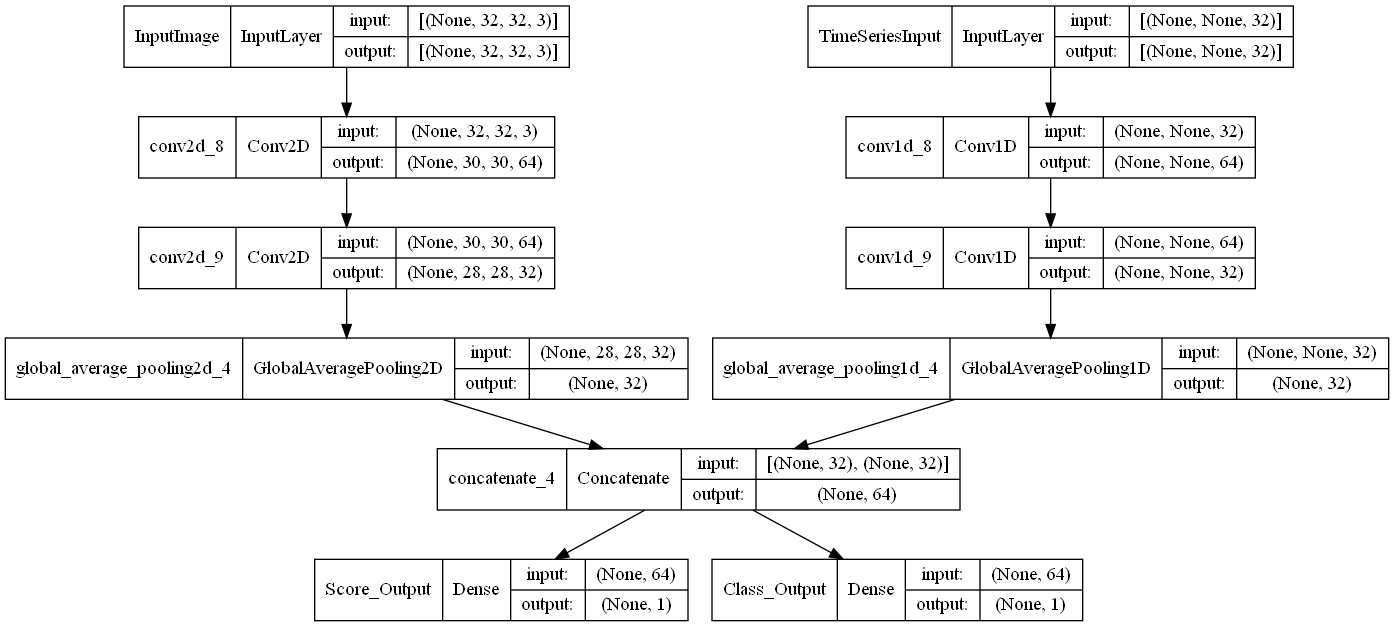

In [60]:
img_inp = tfk.Input(shape=(32, 32, 3), name= 'InputImage')
timeseries_inp = tfk.Input(shape=(None, 32), name='TimeSeriesInput')

img_lyr = tfk.layers.Conv2D(64, 3)(img_inp)
img_lyr = tfk.layers.Conv2D(32, 3)(img_lyr)
img_lyr = tfk.layers.GlobalAveragePooling2D()(img_lyr)

ts_lyr = tfk.layers.Conv1D(64, 3)(timeseries_inp)
ts_lyr = tfk.layers.Conv1D(32, 3)(ts_lyr)
ts_lyr = tfk.layers.GlobalAveragePooling1D()(ts_lyr)

conc_lyr = tfk.layers.concatenate([img_lyr, ts_lyr])

score_output = tfk.layers.Dense(1, name='Score_Output')(conc_lyr)
class_output = tfk.layers.Dense(1, name='Class_Output')(conc_lyr)

inps  = [img_inp, timeseries_inp]
outs = [score_output, class_output]

model = tfk.Model(
    inputs= inps,
    outputs= outs,
    name= "Multi_InputOutput_Model"
)

model = compile_model(model)
tfk.utils.plot_model(model, 'model.png', show_shapes= True)


## **Using Callbacks**

### **Built-in callbacks**


### **Writing custom callbacks**


## **Model Checkpoints**

## **Usign learning-rate schedules**

### **Passing a schedule to an optimizer**

### **Using callbacks to implement a dynamic learning rate schedule**

## **Visualizing loss and metrics during training**

### **Using Tensorboard callback**

# **Wrapup**